## 4. Exploratory Analysis / EDA 

Wir analysieren jetzt den gesamten Datensatz aus einer und mehreren Dimensionen

In [15]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling  
import missingno as msno
from scipy.stats import pearsonr

%matplotlib inline

In [7]:
# Zielverzeichnis (bitte anpassen)
TARGET_DIR = r"/Users/danielmini/Projekte/data_analyics26/data_analytics_master/2_data_acquisition/processed_data"

# CSV-Datei finden und laden
csv_files = [f for f in os.listdir(TARGET_DIR) if f.endswith(".csv")]
df = pd.read_csv(os.path.join(TARGET_DIR, csv_files[0]))

print("DataFrame geladen:", df.shape)

DataFrame geladen: (19158, 14)


## Deskriptive Analyse der Variablen
------------------------------------

- 4.1.) Univariate Analyse, Modus, Lagemaße, Verteilung, Auffälligkeiten 
- 4.2.) Bivariate Analyse, paarweiser vergleich, meist, Kategorie und nummerische Variablen vergleichen 
- 4.3.) Mehrdimensional, wenn möglich

### Analyse der Nominalen Variablen zuerst

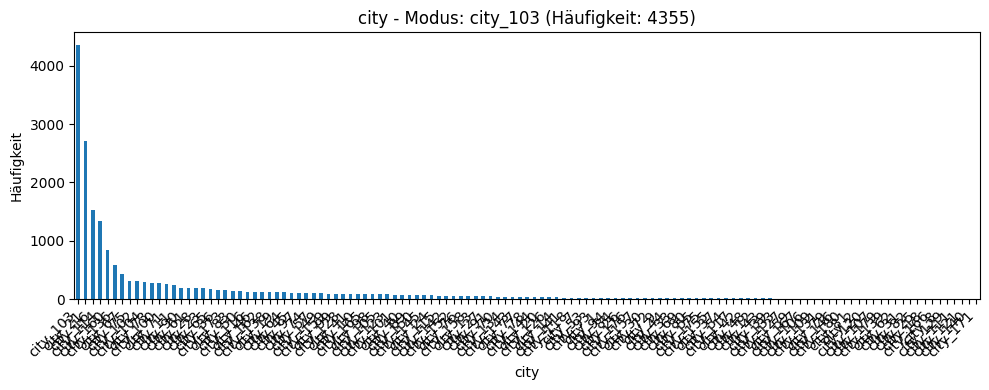


city:
  Modus: city_103
  Häufigkeit: 4355


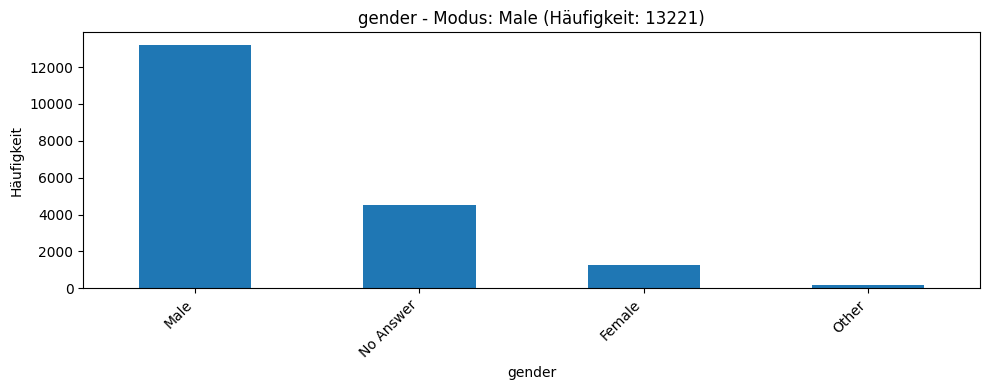


gender:
  Modus: Male
  Häufigkeit: 13221


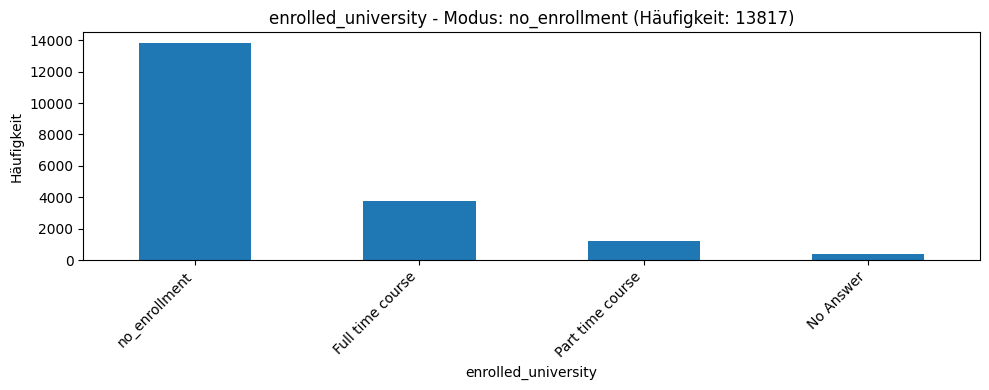


enrolled_university:
  Modus: no_enrollment
  Häufigkeit: 13817


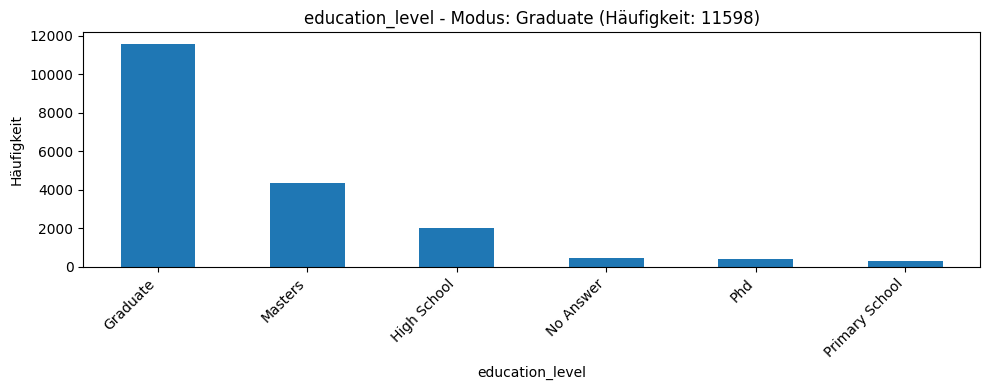


education_level:
  Modus: Graduate
  Häufigkeit: 11598


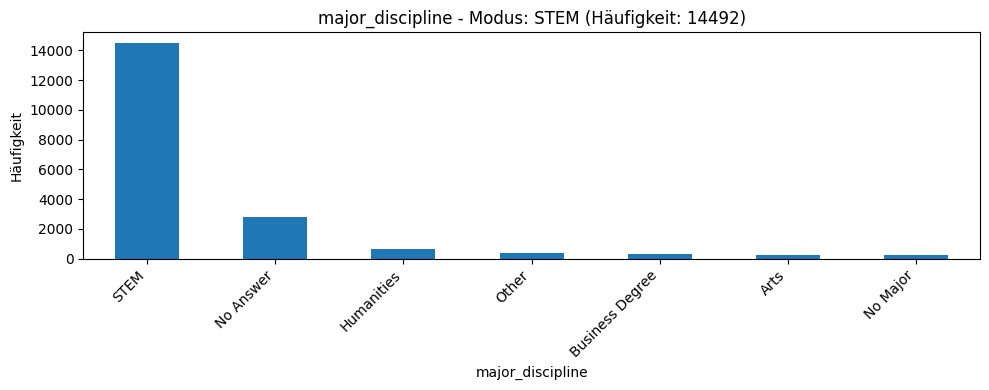


major_discipline:
  Modus: STEM
  Häufigkeit: 14492


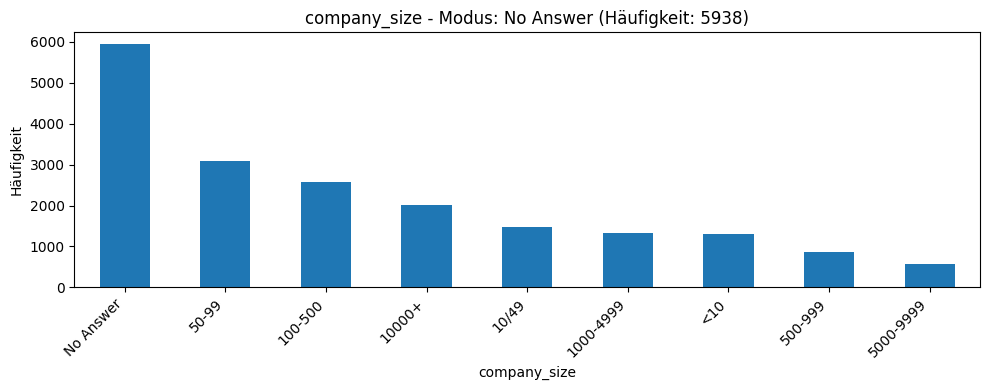


company_size:
  Modus: No Answer
  Häufigkeit: 5938


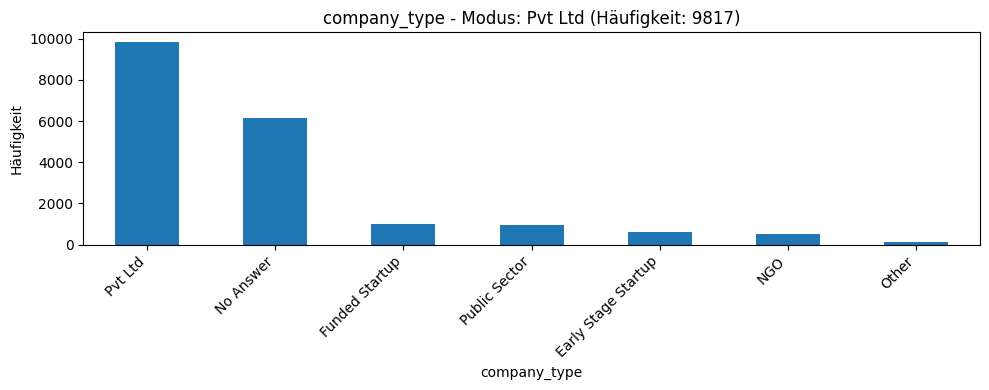


company_type:
  Modus: Pvt Ltd
  Häufigkeit: 9817


In [8]:
# Get categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create bar charts and calculate mode for each categorical variable
for col in categorical_cols:
    # Calculate mode
    mode_value = df[col].mode()[0]
    mode_count = df[col].value_counts()[mode_value]
    
    # Create bar chart
    plt.figure(figsize=(10, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'{col} - Modus: {mode_value} (Häufigkeit: {mode_count})')
    plt.xlabel(col)
    plt.ylabel('Häufigkeit')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    print(f"\n{col}:")
    print(f"  Modus: {mode_value}")
    print(f"  Häufigkeit: {mode_count}")

## Analyse der Ordinalen Variablen

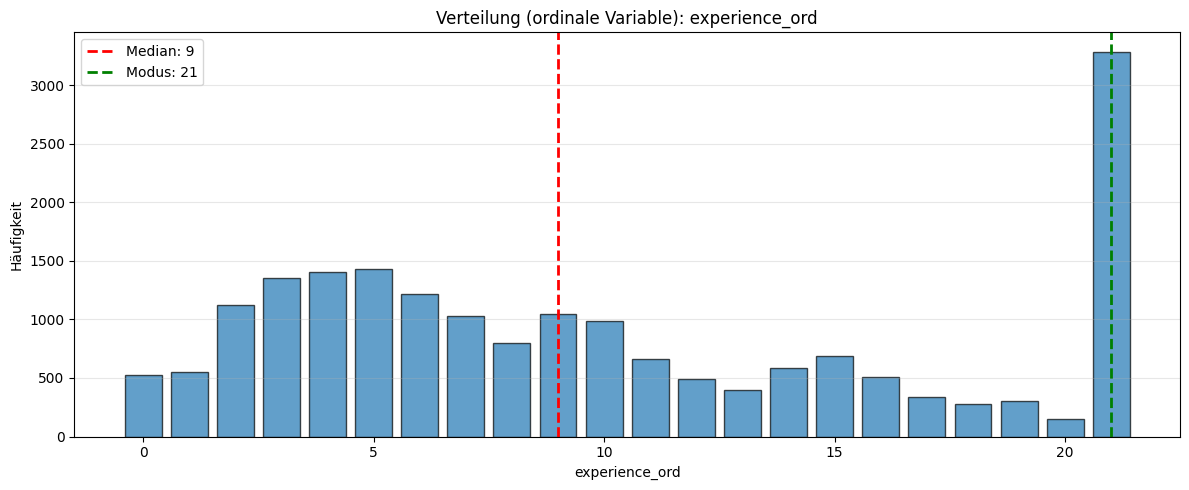


Statistiken für ordinale Variable: experience_ord
  Median:            9
  Modus:             21
  Minimum:           0
  1. Quartil (Q25):  4
  3. Quartil (Q75):  16
  Maximum:           21
  IQR (Q75-Q25):     12
  Anzahl Kategorien: 22

Häufigkeitsverteilung:
  experience_ord = 0:   522 ( 2.72%)
  experience_ord = 1:   549 ( 2.87%)
  experience_ord = 2:  1127 ( 5.88%)
  experience_ord = 3:  1354 ( 7.07%)
  experience_ord = 4:  1403 ( 7.32%)
  experience_ord = 5:  1430 ( 7.46%)
  experience_ord = 6:  1216 ( 6.35%)
  experience_ord = 7:  1028 ( 5.37%)
  experience_ord = 8:   802 ( 4.19%)
  experience_ord = 9:  1045 ( 5.45%)
  experience_ord = 10:   985 ( 5.14%)
  experience_ord = 11:   664 ( 3.47%)
  experience_ord = 12:   494 ( 2.58%)
  experience_ord = 13:   399 ( 2.08%)
  experience_ord = 14:   586 ( 3.06%)
  experience_ord = 15:   686 ( 3.58%)
  experience_ord = 16:   508 ( 2.65%)
  experience_ord = 17:   342 ( 1.79%)
  experience_ord = 18:   280 ( 1.46%)
  experience_ord = 19:  

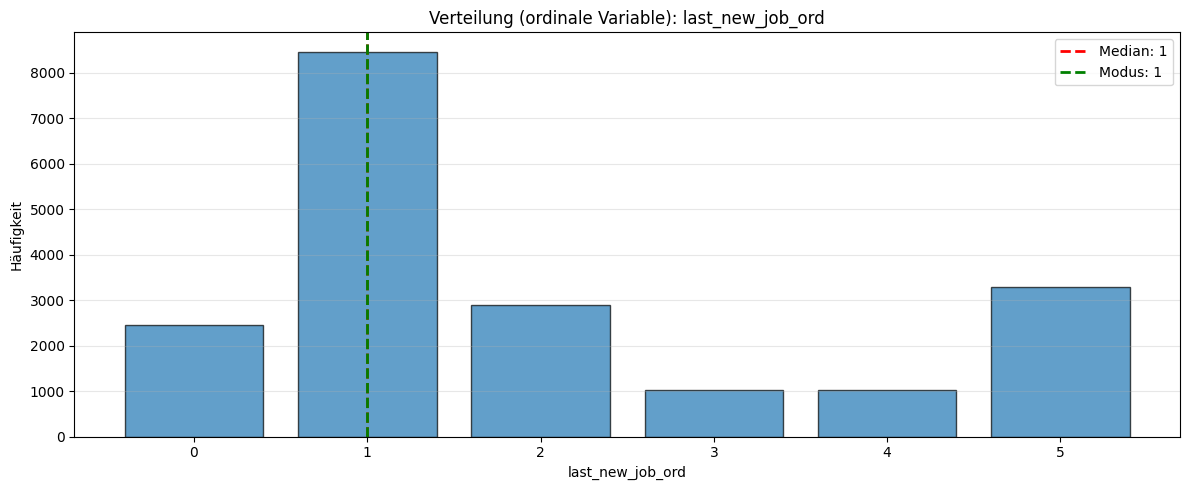


Statistiken für ordinale Variable: last_new_job_ord
  Median:            1
  Modus:             1
  Minimum:           0
  1. Quartil (Q25):  1
  3. Quartil (Q75):  3
  Maximum:           5
  IQR (Q75-Q25):     2
  Anzahl Kategorien: 6

Häufigkeitsverteilung:
  last_new_job_ord = 0:  2452 (12.80%)
  last_new_job_ord = 1:  8463 (44.17%)
  last_new_job_ord = 2:  2900 (15.14%)
  last_new_job_ord = 3:  1024 ( 5.35%)
  last_new_job_ord = 4:  1029 ( 5.37%)
  last_new_job_ord = 5:  3290 (17.17%)


In [9]:
# Get ordinal columns (numerical columns that represent ordered categories)
ordinal_cols = ['experience_ord', 'last_new_job_ord']

# Create bar charts and display statistics for each ordinal variable
for col in ordinal_cols:
    # Calculate statistics
    median_val = df[col].median()
    mode_val = df[col].mode()[0]
    q25 = df[col].quantile(0.25)
    q75 = df[col].quantile(0.75)
    min_val = df[col].min()
    max_val = df[col].max()
    
    # Value counts for bar chart
    value_counts = df[col].value_counts().sort_index()
    
    # Create figure with bar chart
    fig, ax = plt.subplots(1, 1, figsize=(12, 5))
    
    # Bar chart
    ax.bar(value_counts.index, value_counts.values, edgecolor='black', alpha=0.7)
    ax.axvline(median_val, color='red', linestyle='--', linewidth=2, label=f'Median: {median_val:.0f}')
    ax.axvline(mode_val, color='green', linestyle='--', linewidth=2, label=f'Modus: {mode_val:.0f}')
    ax.set_title(f'Verteilung (ordinale Variable): {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Häufigkeit')
    ax.legend()
    ax.grid(alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\n{'='*60}")
    print(f"Statistiken für ordinale Variable: {col}")
    print(f"{'='*60}")
    print(f"  Median:            {median_val:.0f}")
    print(f"  Modus:             {mode_val:.0f}")
    print(f"  Minimum:           {min_val:.0f}")
    print(f"  1. Quartil (Q25):  {q25:.0f}")
    print(f"  3. Quartil (Q75):  {q75:.0f}")
    print(f"  Maximum:           {max_val:.0f}")
    print(f"  IQR (Q75-Q25):     {q75 - q25:.0f}")
    print(f"  Anzahl Kategorien: {df[col].nunique()}")
    print(f"\nHäufigkeitsverteilung:")
    for idx, count in value_counts.items():
        percentage = (count / len(df)) * 100
        print(f"  {col} = {idx:.0f}: {count:5d} ({percentage:5.2f}%)")

## Analyse der Metrischen Variablen

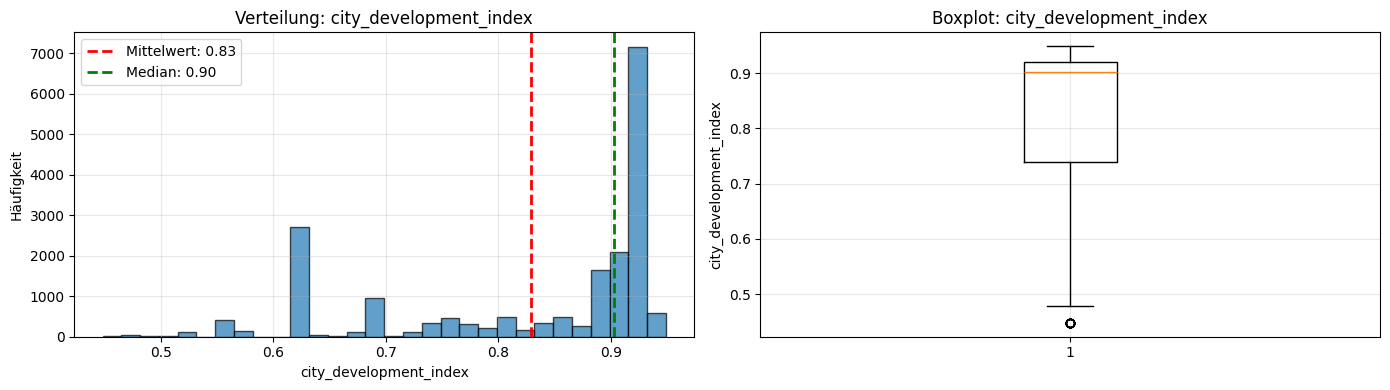


Statistiken für: city_development_index
  Mittelwert:        0.83
  Median:            0.90
  Standardabweichung: 0.12
  Minimum:           0.45
  1. Quartil (Q25):  0.74
  3. Quartil (Q75):  0.92
  Maximum:           0.95
  Spannweite:        0.50
  IQR (Q75-Q25):     0.18


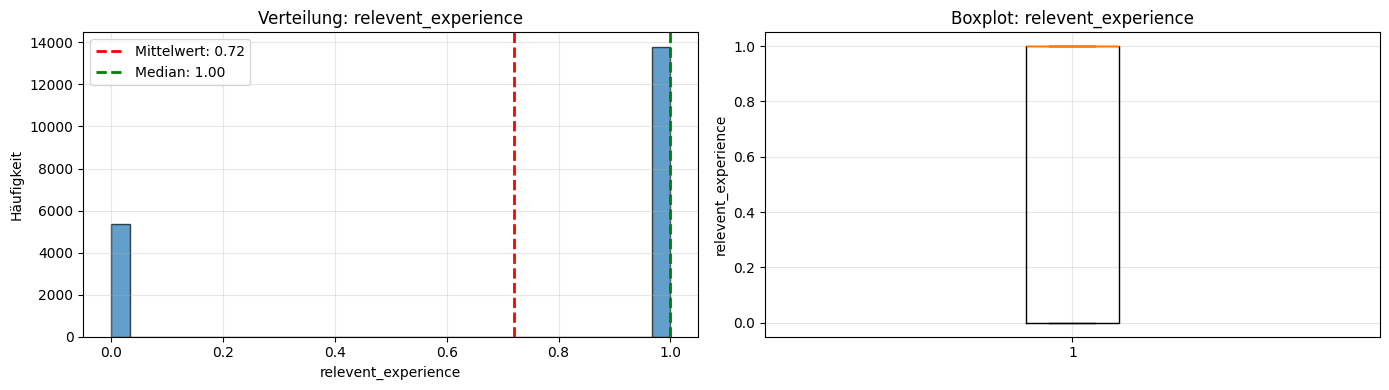


Statistiken für: relevent_experience
  Mittelwert:        0.72
  Median:            1.00
  Standardabweichung: 0.45
  Minimum:           0.00
  1. Quartil (Q25):  0.00
  3. Quartil (Q75):  1.00
  Maximum:           1.00
  Spannweite:        1.00
  IQR (Q75-Q25):     1.00


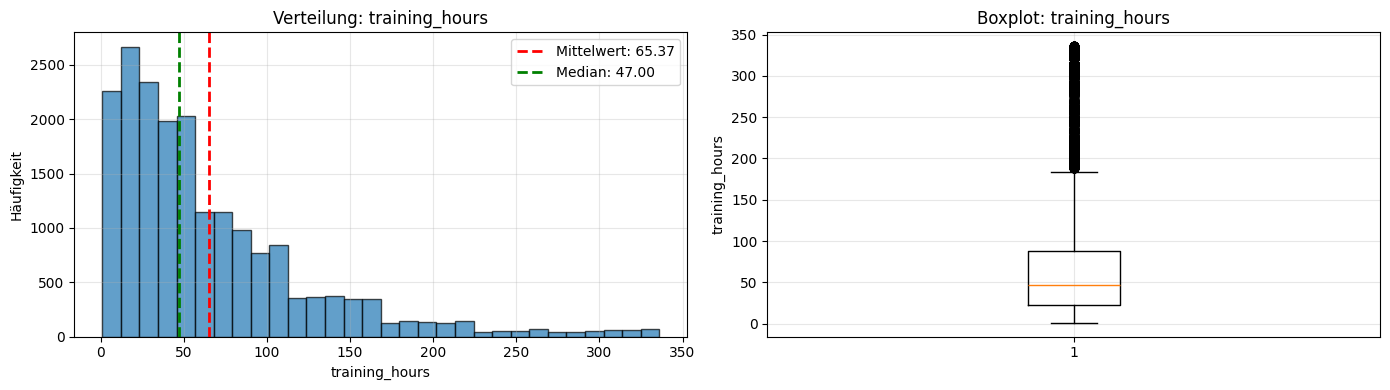


Statistiken für: training_hours
  Mittelwert:        65.37
  Median:            47.00
  Standardabweichung: 60.06
  Minimum:           1.00
  1. Quartil (Q25):  23.00
  3. Quartil (Q75):  88.00
  Maximum:           336.00
  Spannweite:        335.00
  IQR (Q75-Q25):     65.00


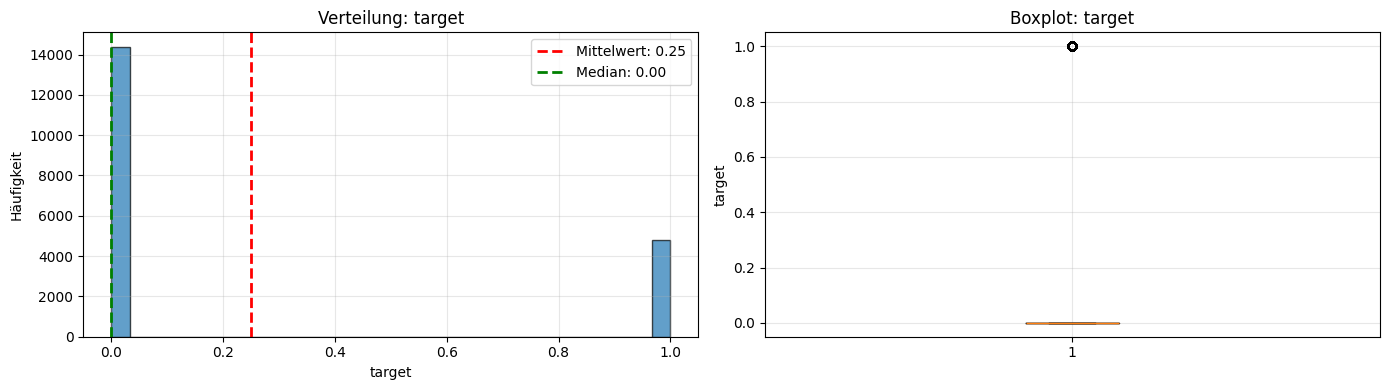


Statistiken für: target
  Mittelwert:        0.25
  Median:            0.00
  Standardabweichung: 0.43
  Minimum:           0.00
  1. Quartil (Q25):  0.00
  3. Quartil (Q75):  0.00
  Maximum:           1.00
  Spannweite:        1.00
  IQR (Q75-Q25):     0.00


In [10]:
# Get numerical columns
numerical_cols = df.select_dtypes(include=['float64','int64']).columns
# Exclude ID column
numerical_cols = [col for col in numerical_cols if col not in ['enrollee_id', 'experience_ord', 'last_new_job_ord']]

# Create histograms and display statistics for each numerical variable
for col in numerical_cols:
    # Calculate statistics
    mean_val = df[col].mean()
    median_val = df[col].median()
    std_val = df[col].std()
    q25 = df[col].quantile(0.25)
    q75 = df[col].quantile(0.75)
    min_val = df[col].min()
    max_val = df[col].max()
    
    # Create figure with histogram and boxplot
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    
    # Histogram with KDE
    axes[0].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mittelwert: {mean_val:.2f}')
    axes[0].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[0].set_title(f'Verteilung: {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Häufigkeit')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # Boxplot
    axes[1].boxplot(df[col].dropna(), vert=True)
    axes[1].set_title(f'Boxplot: {col}')
    axes[1].set_ylabel(col)
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\n{'='*60}")
    print(f"Statistiken für: {col}")
    print(f"{'='*60}")
    print(f"  Mittelwert:        {mean_val:.2f}")
    print(f"  Median:            {median_val:.2f}")
    print(f"  Standardabweichung: {std_val:.2f}")
    print(f"  Minimum:           {min_val:.2f}")
    print(f"  1. Quartil (Q25):  {q25:.2f}")
    print(f"  3. Quartil (Q75):  {q75:.2f}")
    print(f"  Maximum:           {max_val:.2f}")
    print(f"  Spannweite:        {max_val - min_val:.2f}")
    print(f"  IQR (Q75-Q25):     {q75 - q25:.2f}")

## Bivariate Datenananlyse

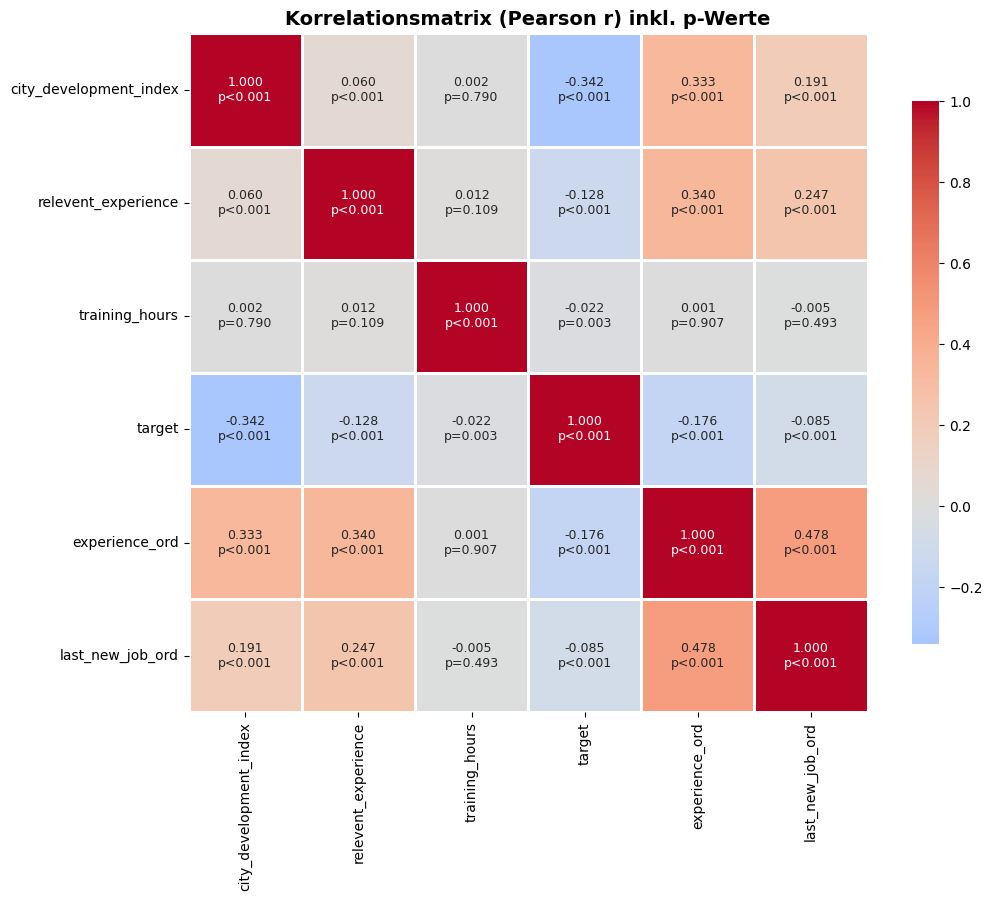



Stärkste Korrelationen mit der Zielvariable 'target':
  training_hours                : r=-0.022  (p=0.003)
  last_new_job_ord              : r=-0.085  (p<0.001)
  relevent_experience           : r=-0.128  (p<0.001)
  experience_ord                : r=-0.176  (p<0.001)
  city_development_index        : r=-0.342  (p<0.001)


In [19]:
# 1) Spaltenauswahl
cols = [
    'city_development_index', 'relevent_experience', 'training_hours',
    'target', 'experience_ord', 'last_new_job_ord'
]
data = df[cols].copy()

# (Optional) sicherstellen, dass alles numerisch ist (sonst werden Non-Numeric zu NaN)
data = data.apply(pd.to_numeric, errors='coerce')

# 2) Korrelations- und P-Wert-Matrizen berechnen (pairwise, NaNs werden pro Paar gedroppt)
corr = pd.DataFrame(np.nan, index=cols, columns=cols, dtype=float)
pval = pd.DataFrame(np.nan, index=cols, columns=cols, dtype=float)

for i in cols:
    for j in cols:
        x = data[i]
        y = data[j]
        mask = x.notna() & y.notna()
        if mask.sum() >= 3:  # pearsonr braucht mind. 2; 3 ist etwas robuster
            r, p = pearsonr(x[mask], y[mask])
            corr.loc[i, j] = r
            pval.loc[i, j] = p

# 3) Annotationen: "r\np=..."
def fmt_p(p):
    if pd.isna(p):
        return "p=NA"
    if p < 0.001:
        return "p<0.001"
    return f"p={p:.3f}"

annot = corr.copy().astype(object)
for i in cols:
    for j in cols:
        r = corr.loc[i, j]
        p = pval.loc[i, j]
        if pd.isna(r):
            annot.loc[i, j] = ""
        else:
            annot.loc[i, j] = f"{r:.3f}\n{fmt_p(p)}"

# 4) Heatmap plotten (fmt='' ist wichtig, damit unsere Strings nicht formatiert werden)
plt.figure(figsize=(11, 9))
sns.heatmap(
    corr,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 9}
)
plt.title("Korrelationsmatrix (Pearson r) inkl. p-Werte", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

print("\n\nStärkste Korrelationen mit der Zielvariable 'target':")
target_corr = corr['target'].sort_values(ascending=False)
for var, corr_val in target_corr.items():
    if var != 'target':
        p = pval.loc[var, 'target']
        print(f"  {var:30s}: r={corr_val:6.3f}  ({fmt_p(p)})")



1. PAIRPLOT - Numerische Variablen
--------------------------------------------------------------------------------


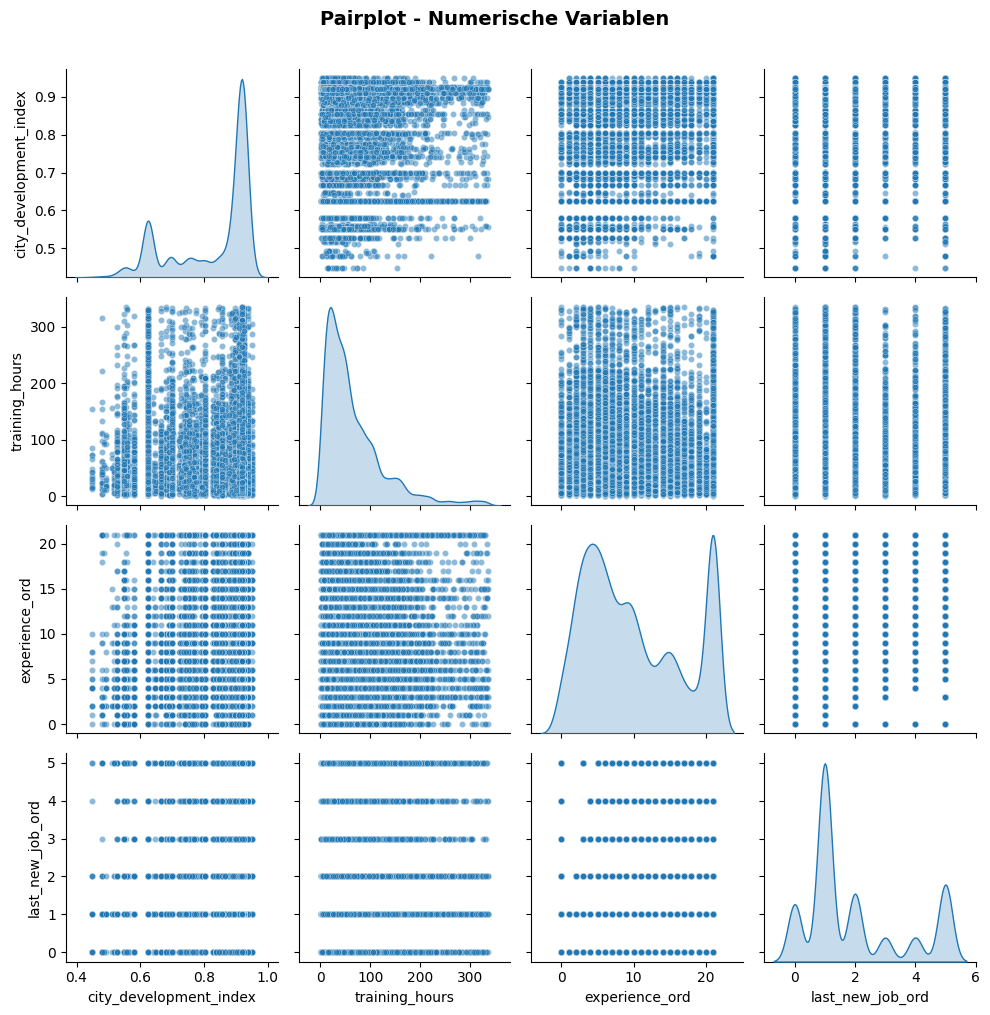


2. EXPERIENCE_ORD vs. CITY_DEVELOPMENT_INDEX
--------------------------------------------------------------------------------


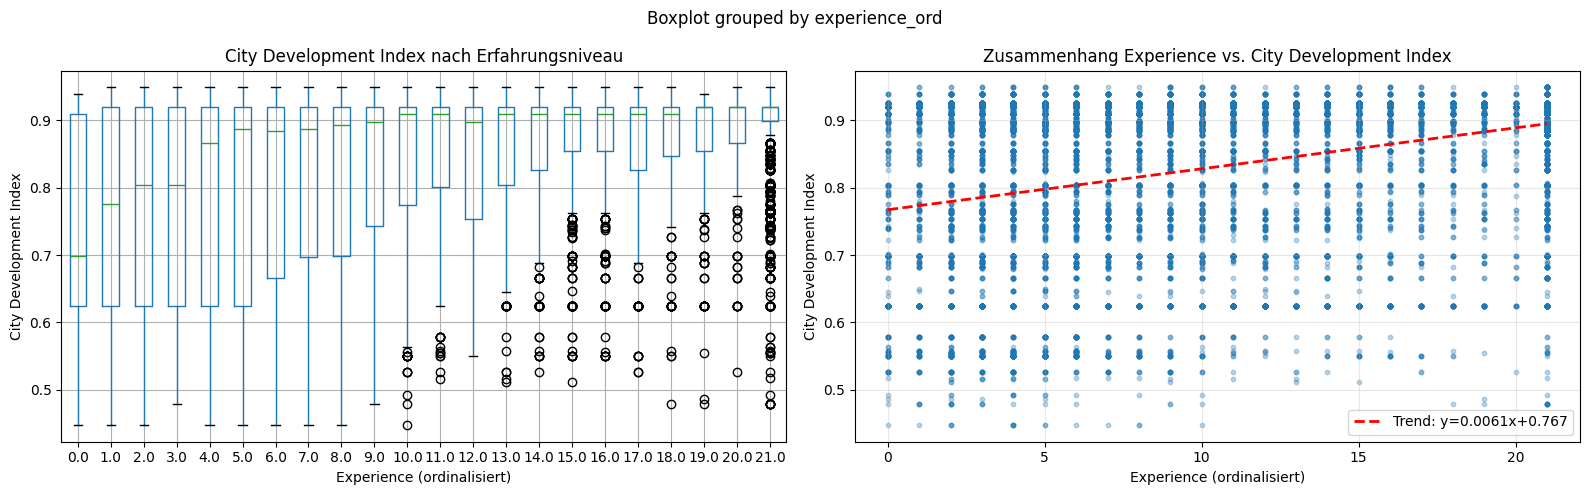


Korrelation: 0.333


In [20]:
# 1. Numerische Variablen: Pairplot
print("\n1. PAIRPLOT - Numerische Variablen")
print("-"*80)

# Auswahl relevanter numerischer Variablen (ohne target)
num_vars = ['city_development_index', 'training_hours', 'experience_ord', 'last_new_job_ord']

# Pairplot
sns.pairplot(df[num_vars], diag_kind='kde', plot_kws={'alpha': 0.5, 's': 20})
plt.suptitle('Pairplot - Numerische Variablen', y=1.01, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 2. Erfahrung vs. Entwicklungsindex
print("\n2. EXPERIENCE_ORD vs. CITY_DEVELOPMENT_INDEX")
print("-"*80)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Boxplot
df.boxplot(column='city_development_index', by='experience_ord', ax=axes[0])
axes[0].set_title('City Development Index nach Erfahrungsniveau')
axes[0].set_xlabel('Experience (ordinalisiert)')
axes[0].set_ylabel('City Development Index')
plt.sca(axes[0])

# Scatter mit Trendlinie
axes[1].scatter(df['experience_ord'], df['city_development_index'], alpha=0.3, s=10)
z = np.polyfit(df['experience_ord'], df['city_development_index'], 1)
p = np.poly1d(z)
axes[1].plot(df['experience_ord'].sort_values(), p(df['experience_ord'].sort_values()), 
             "r--", linewidth=2, label=f'Trend: y={z[0]:.4f}x+{z[1]:.3f}')
axes[1].set_xlabel('Experience (ordinalisiert)')
axes[1].set_ylabel('City Development Index')
axes[1].set_title('Zusammenhang Experience vs. City Development Index')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nKorrelation: {corr.loc['experience_ord', 'city_development_index']:.3f}")




3. TRAINING_HOURS - Verteilung nach Kategorien
--------------------------------------------------------------------------------


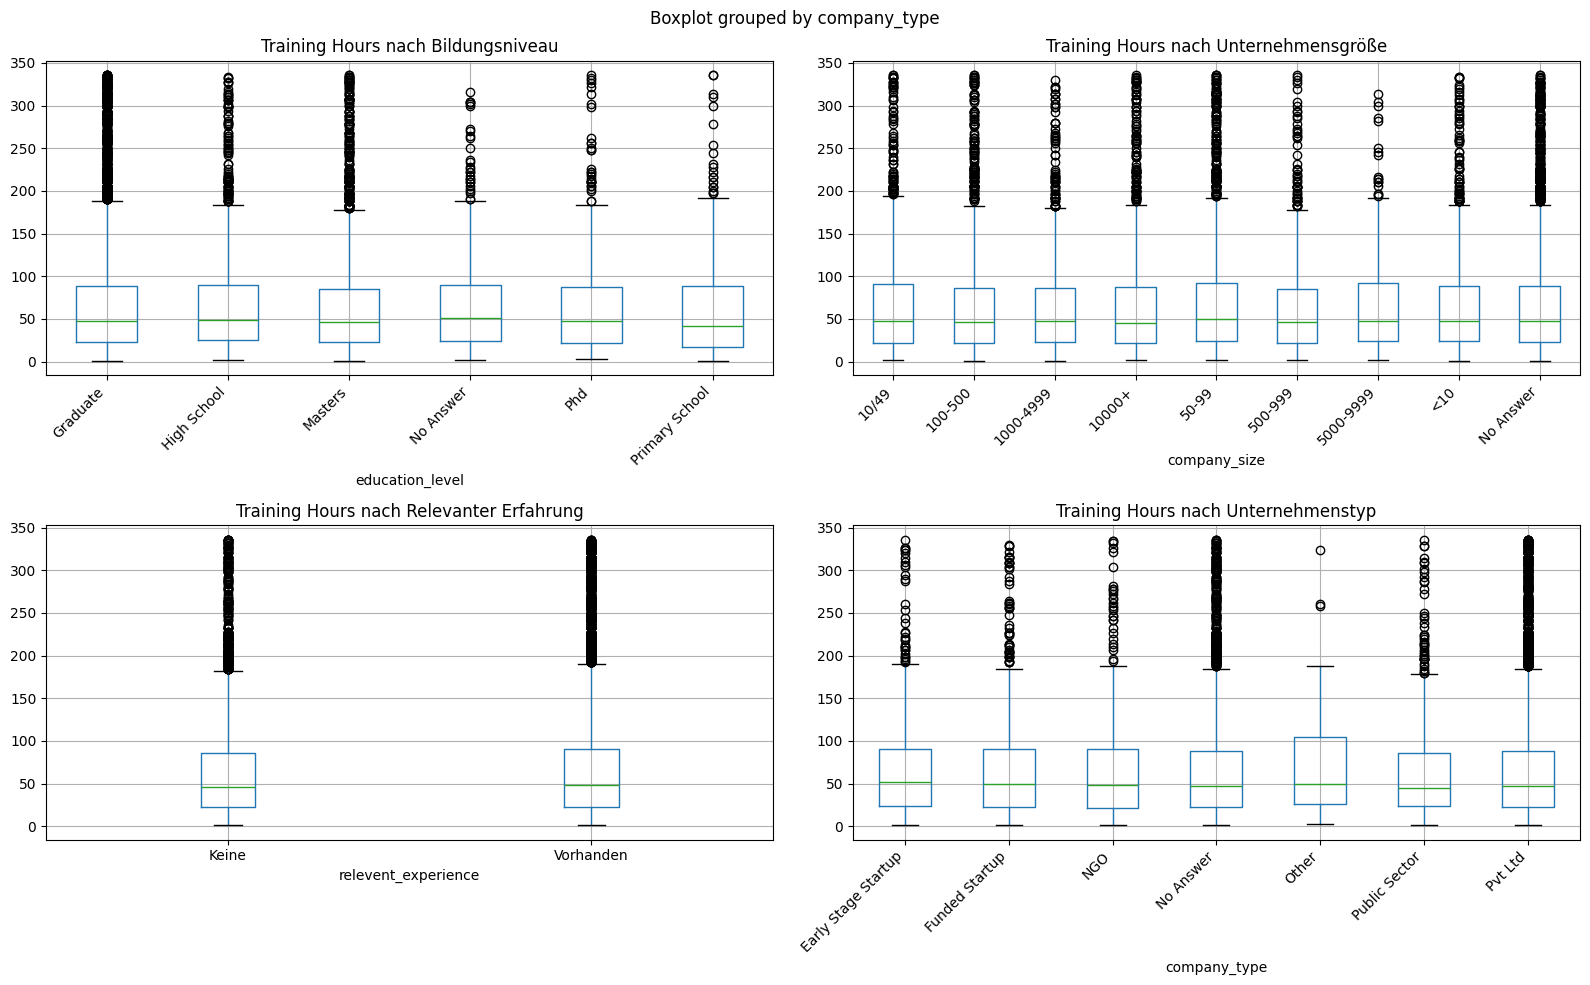

In [22]:
# 3. Training Hours vs. andere Variablen
print("\n3. TRAINING_HOURS - Verteilung nach Kategorien")
print("-"*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Training Hours vs. Education Level
df.boxplot(column='training_hours', by='education_level', ax=axes[0,0])
axes[0,0].set_title('Training Hours nach Bildungsniveau')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
plt.sca(axes[0,0])

# Training Hours vs. Company Size
df.boxplot(column='training_hours', by='company_size', ax=axes[0,1])
axes[0,1].set_title('Training Hours nach Unternehmensgröße')
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45, ha='right')
plt.sca(axes[0,1])

# Training Hours vs. Relevant Experience
df.boxplot(column='training_hours', by='relevent_experience', ax=axes[1,0])
axes[1,0].set_title('Training Hours nach Relevanter Erfahrung')
axes[1,0].set_xticklabels(['Keine', 'Vorhanden'])
plt.sca(axes[1,0])

# Training Hours vs. Company Type
df.boxplot(column='training_hours', by='company_type', ax=axes[1,1])
axes[1,1].set_title('Training Hours nach Unternehmenstyp')
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45, ha='right')
plt.sca(axes[1,1])

plt.tight_layout()
plt.show()



4. KATEGORIALE VARIABLE - KOMBINATIONEN
--------------------------------------------------------------------------------

Bildungsniveau vs. Erfahrung:
experience_ord   0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   \
education_level                                                               
Graduate          296   297   642   820   880   918   818   645   483   641   
High School       103   111   242   258   247   202   152   102    80    88   
Masters            65    79   132   173   205   231   200   229   207   262   
No Answer          27    33    64    48    34    43    26    20    12    24   
Phd                 3     3     4     4     7     7     5    12     8    20   
Primary School     28    26    43    51    30    29    15    20    12    10   

experience_ord   ...  12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  \
education_level  ...                                                         
Graduate         ...   326   244   357   402   305   215  

<Figure size 1200x600 with 0 Axes>

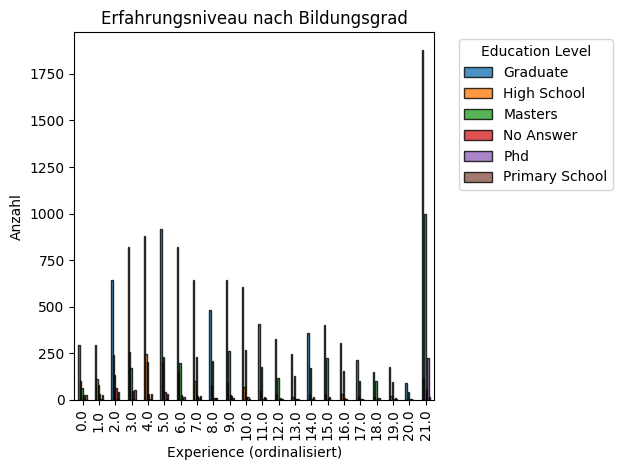


5. COMPANY_SIZE vs. CITY_DEVELOPMENT_INDEX
--------------------------------------------------------------------------------
                  mean  median  count
company_size                         
1000-4999     0.857128   0.913   1328
5000-9999     0.849064   0.910    563
10000+        0.846206   0.920   2019
500-999       0.836881   0.910    877
100-500       0.835129   0.910   2571
50-99         0.829356   0.903   3083
<10           0.824622   0.896   1308
No Answer     0.815162   0.893   5938
10/49         0.813927   0.896   1471


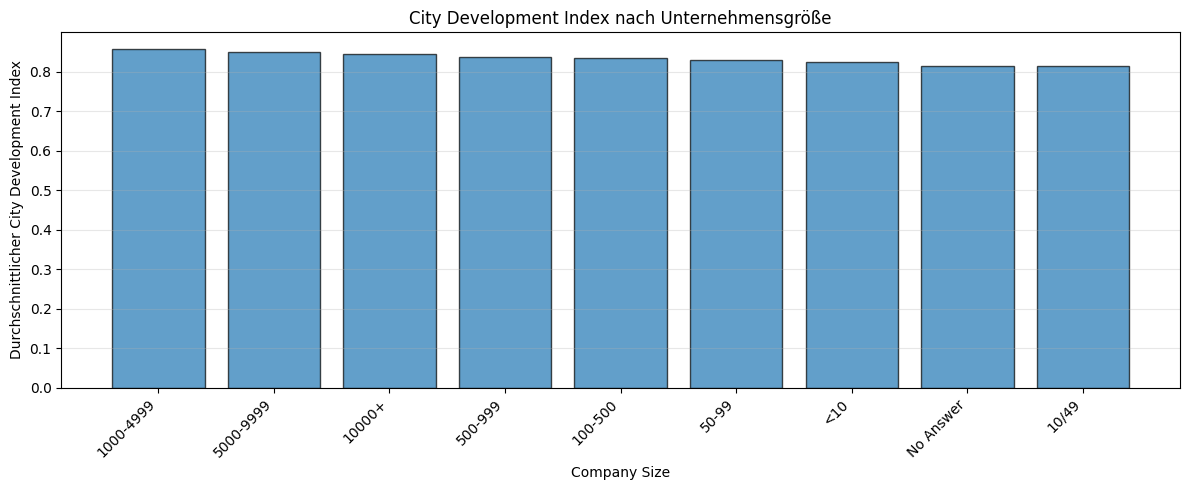


BIVARIATE ANALYSE ABGESCHLOSSEN


In [ ]:
# 4. Kategoriale Kombinationen (Clustering-relevant)
print("\n4. KATEGORIALE VARIABLE - KOMBINATIONEN")
print("-"*80)

# Education vs. Experience
print("\nBildungsniveau vs. Erfahrung:")
edu_exp = pd.crosstab(df['education_level'], df['experience_ord'])
print(edu_exp)

plt.figure(figsize=(12, 6))
edu_exp.T.plot(kind='bar', stacked=False, alpha=0.8, edgecolor='black')
plt.title('Erfahrungsniveau nach Bildungsgrad')
plt.xlabel('Experience (ordinalisiert)')
plt.ylabel('Anzahl')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Company Size vs. City Development Index
print("\n5. COMPANY_SIZE vs. CITY_DEVELOPMENT_INDEX")
print("-"*80)

size_dev = df.groupby('company_size')['city_development_index'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
print(size_dev)

plt.figure(figsize=(12, 5))
plt.bar(range(len(size_dev)), size_dev['mean'], edgecolor='black', alpha=0.7)
plt.xticks(range(len(size_dev)), size_dev.index, rotation=45, ha='right')
plt.ylabel('Durchschnittlicher City Development Index')
plt.xlabel('Company Size')
plt.title('City Development Index nach Unternehmensgröße')
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()



BIVARIATE ANALYSE: Vergleich numerischer Variablen mit Target
--------------------------------------------------------------------------------


/var/folders/cg/yv60s98n3c386_j153yzvnyw0000gn/T/ipykernel_28517/2362470225.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, palette='Set2')


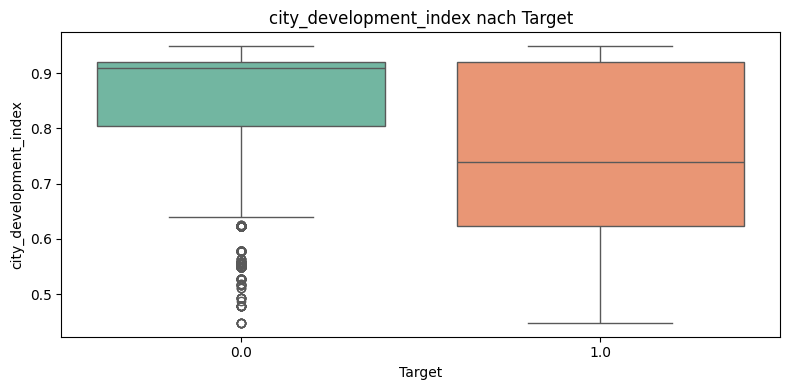

/var/folders/cg/yv60s98n3c386_j153yzvnyw0000gn/T/ipykernel_28517/2362470225.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, palette='Set2')


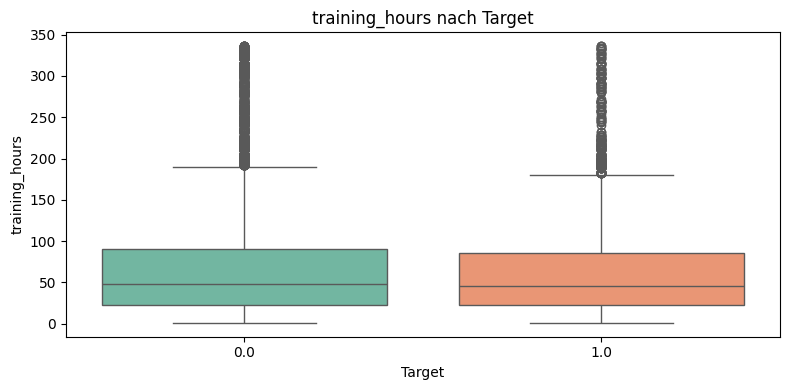

/var/folders/cg/yv60s98n3c386_j153yzvnyw0000gn/T/ipykernel_28517/2362470225.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, palette='Set2')


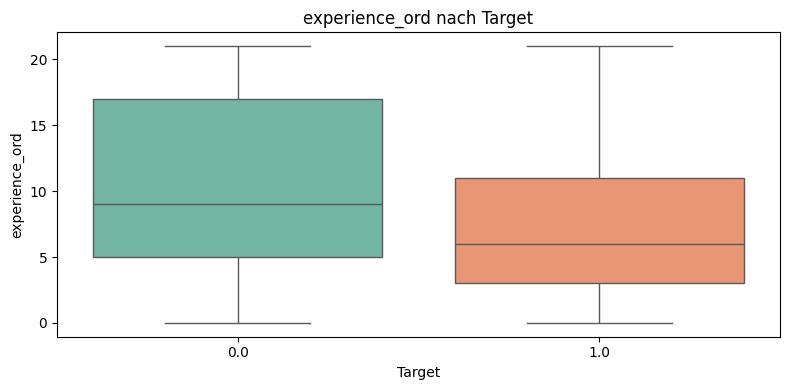

/var/folders/cg/yv60s98n3c386_j153yzvnyw0000gn/T/ipykernel_28517/2362470225.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, palette='Set2')


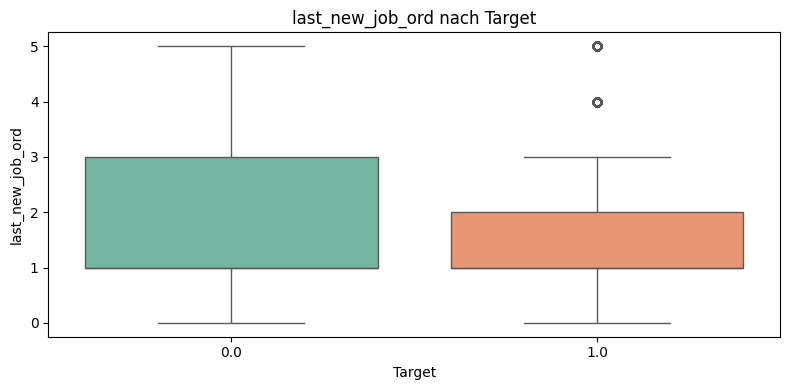

/var/folders/cg/yv60s98n3c386_j153yzvnyw0000gn/T/ipykernel_28517/2362470225.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.index, y=target_corr.values, palette='coolwarm')


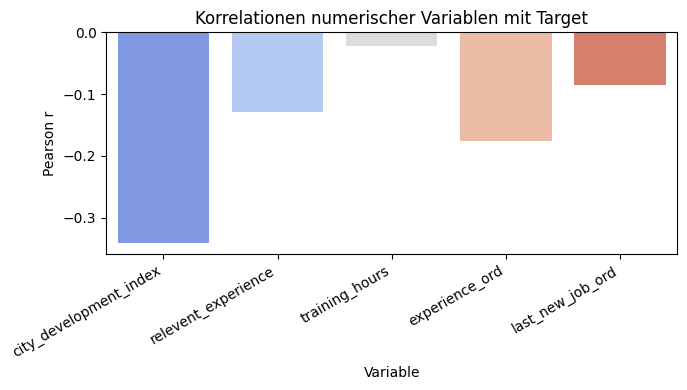

In [27]:
# Ergänzung: Bivariate Grafiken mit Vergleich zum Target

print("\nBIVARIATE ANALYSE: Vergleich numerischer Variablen mit Target")
print("-"*80)

# Scatterplots: numerische Variablen vs. Target
for col in num_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='target', y=col, data=df, palette='Set2')
    plt.title(f'{col} nach Target')
    plt.xlabel('Target')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Korrelationen mit Target visualisieren
plt.figure(figsize=(7, 4))
target_corr = corr['target'].drop('target')
sns.barplot(x=target_corr.index, y=target_corr.values, palette='coolwarm')
plt.title('Korrelationen numerischer Variablen mit Target')
plt.ylabel('Pearson r')
plt.xlabel('Variable')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

 ============================================================================
### MULTIVARIATE ANALYSE
 ============================================================================

MULTIVARIATE ANALYSE - Mehrdimensionale Zusammenhänge

1. TARGET-RATE NACH MEHREREN KATEGORISCHEN MERKMALEN
--------------------------------------------------------------------------------

1.1 Education Level × Experience × Target


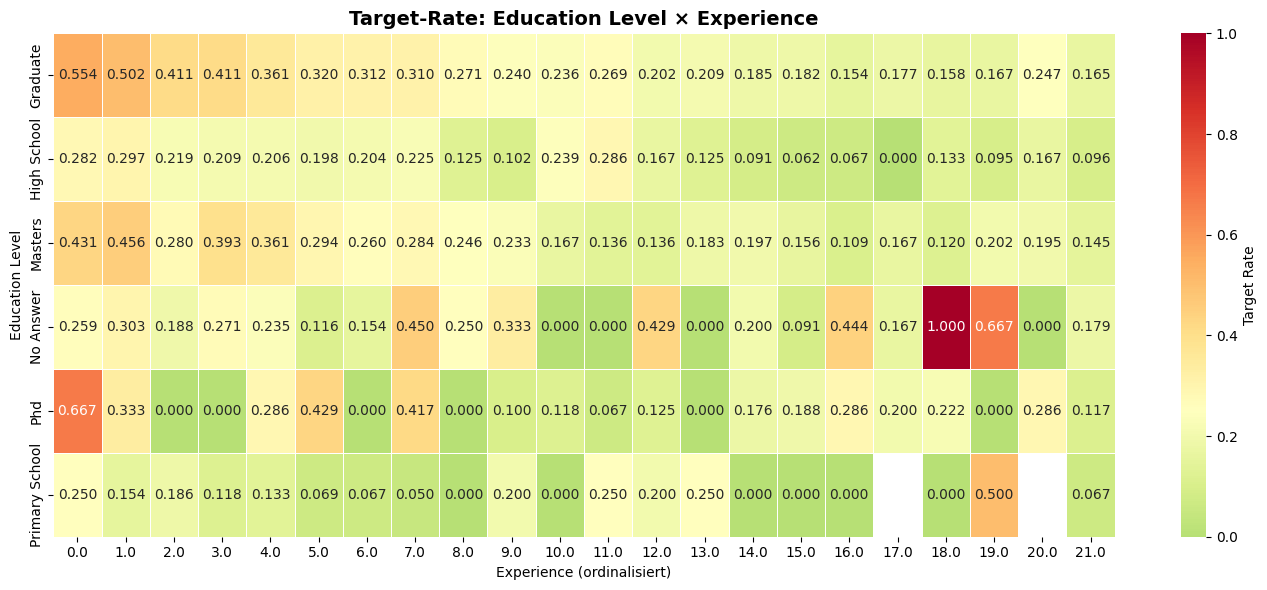


1.2 Company Type × Company Size × Target


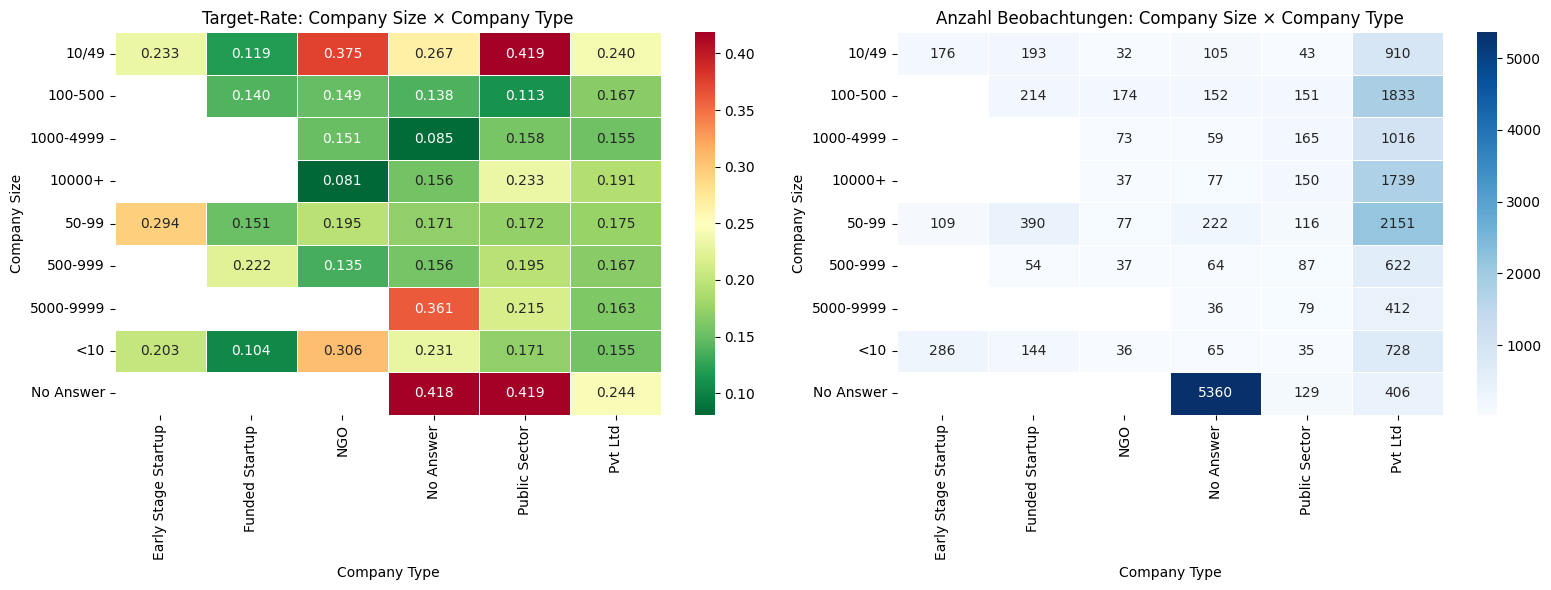


1.3 Gender × Education × Relevant Experience
relevent_experience            0      1
gender    education_level              
Female    Graduate         0.273  0.727
          High School      0.746  0.254
          Masters          0.230  0.770
          No Answer        0.250  0.750
          Phd              0.489  0.511
          Primary School   0.750  0.250
Male      Graduate         0.201  0.799
          High School      0.576  0.424
          Masters          0.154  0.846
          No Answer        0.521  0.479
          Phd              0.339  0.661
          Primary School   0.744  0.256
No Answer Graduate         0.316  0.684
          High School      0.692  0.308
          Masters          0.232  0.768
          No Answer        0.577  0.423
          Phd              0.446  0.554
          Primary School   0.863  0.137
Other     Graduate         0.384  0.616
          High School      0.636  0.364
          Masters          0.333  0.667
          No Answer        0.556  

/var/folders/cg/yv60s98n3c386_j153yzvnyw0000gn/T/ipykernel_28517/1530177435.py:70: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cdi_multi = df.groupby(['cdi_group', 'education_level', 'relevent_experience'])['target'].agg(['mean', 'count']).reset_index()


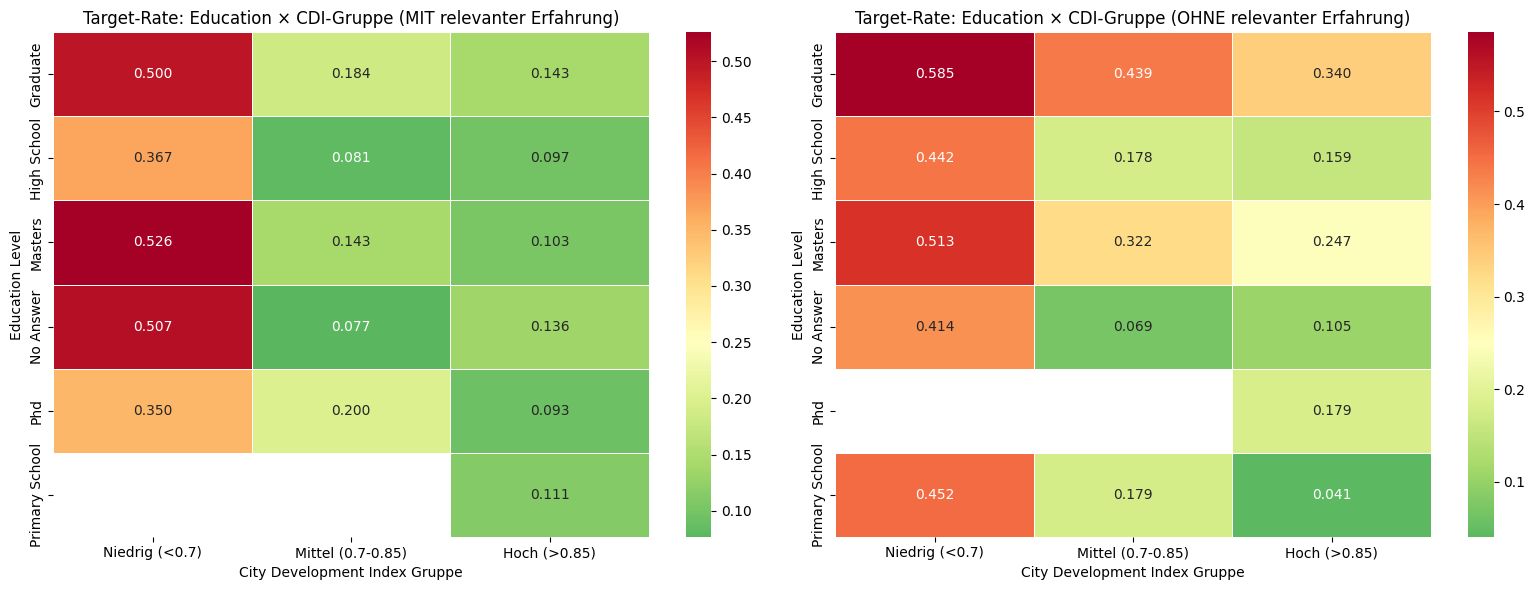



3. INTERAKTIONSEFFEKTE
--------------------------------------------------------------------------------

3.1 Training Hours nach Company Type und Target


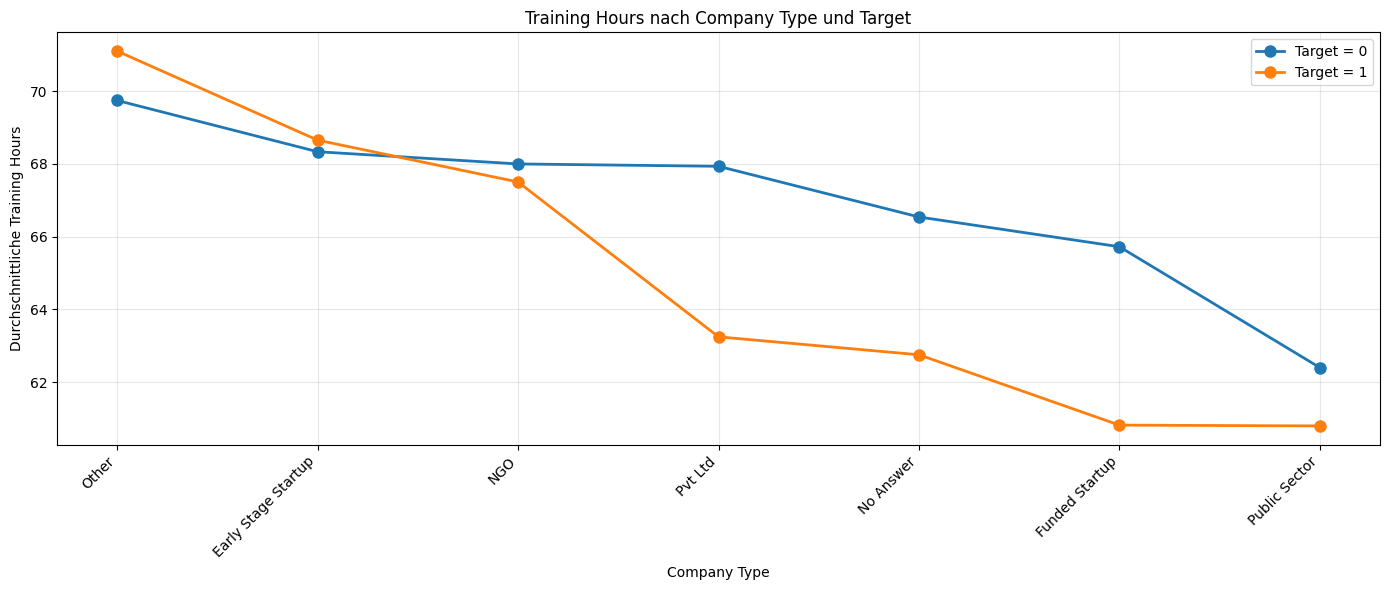


3.2 Experience × Last New Job × Target


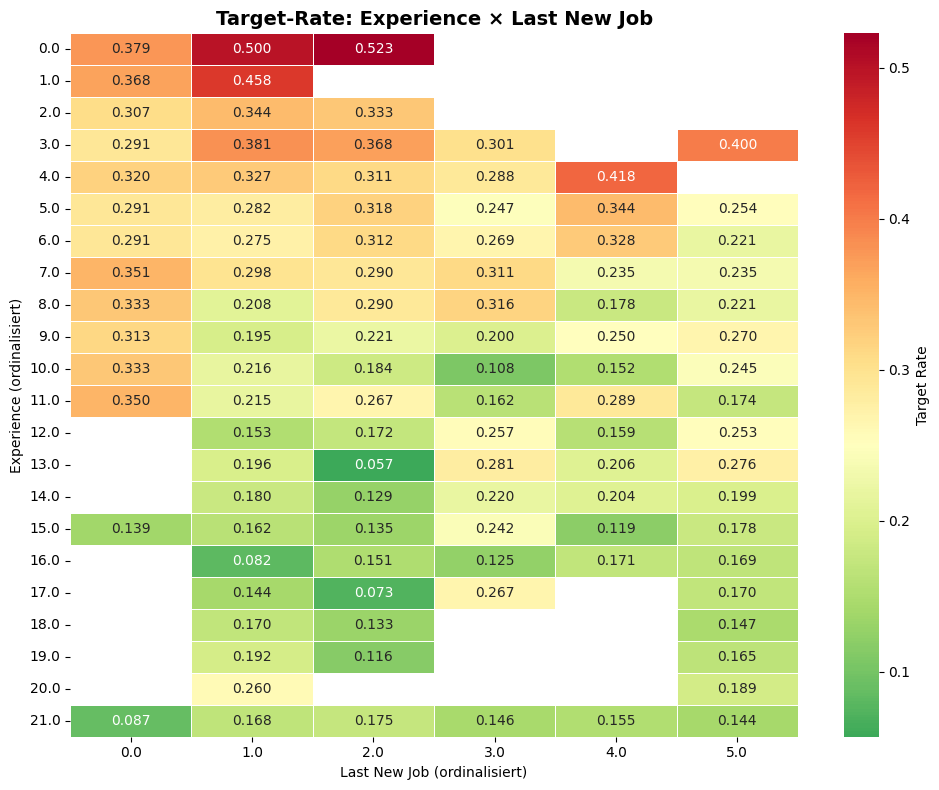



4. PROFILING: TARGET = 0 vs. TARGET = 1
--------------------------------------------------------------------------------


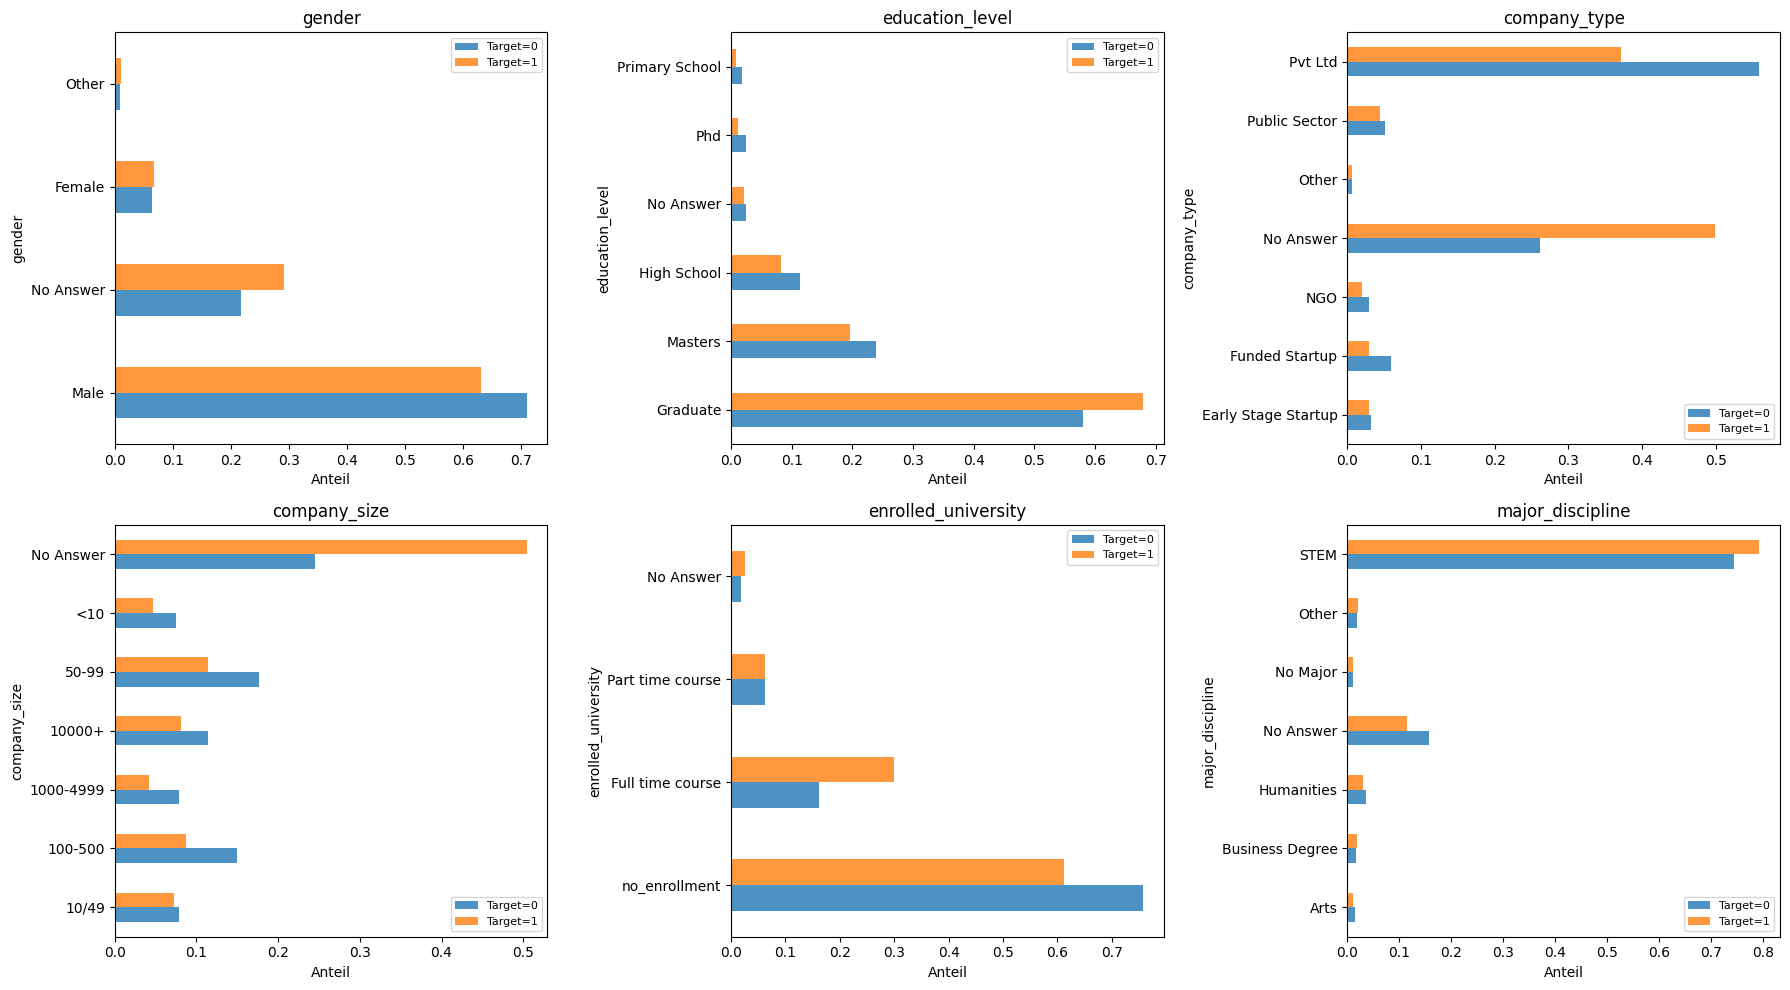



5. ZUSAMMENFASSUNG - WICHTIGSTE ERKENNTNISSE

5.1 Top 10 Kombinationen mit HÖCHSTER Target-Rate (min. 50 Beobachtungen):
  Graduate        | No Answer            | RelExp=0 → Target-Rate: 0.555 (n=1517)
  Masters         | No Answer            | RelExp=0 → Target-Rate: 0.472 (n=320)
  Graduate        | No Answer            | RelExp=1 → Target-Rate: 0.418 (n=1839)
  Graduate        | Public Sector        | RelExp=0 → Target-Rate: 0.323 (n=164)
  Masters         | No Answer            | RelExp=1 → Target-Rate: 0.297 (n=747)
  No Answer       | No Answer            | RelExp=1 → Target-Rate: 0.284 (n=95)
  High School     | No Answer            | RelExp=0 → Target-Rate: 0.281 (n=891)
  Masters         | Public Sector        | RelExp=0 → Target-Rate: 0.272 (n=125)
  Graduate        | NGO                  | RelExp=0 → Target-Rate: 0.264 (n=72)
  Graduate        | Pvt Ltd              | RelExp=0 → Target-Rate: 0.259 (n=827)

5.2 Top 10 Kombinationen mit NIEDRIGSTER Target-Rate (min. 50 Beob

In [ ]:
# ============================================================================
# MULTIVARIATE ANALYSE
# ============================================================================

print("="*80)
print("MULTIVARIATE ANALYSE - Mehrdimensionale Zusammenhänge")
print("="*80)

# 1. Target vs. multiple kategoriale Variablen
print("\n1. TARGET-RATE NACH MEHREREN KATEGORISCHEN MERKMALEN")
print("-"*80)

# 1.1 Education + Experience + Target
print("\n1.1 Education Level × Experience × Target")
edu_exp_target = df.groupby(['education_level', 'experience_ord'])['target'].agg(['mean', 'count']).reset_index()
edu_exp_target_pivot = edu_exp_target.pivot(index='experience_ord', columns='education_level', values='mean')

plt.figure(figsize=(14, 6))
sns.heatmap(edu_exp_target_pivot.T, annot=True, fmt='.3f', cmap='RdYlGn_r', 
            center=0.25, linewidths=0.5, cbar_kws={'label': 'Target Rate'})
plt.title('Target-Rate: Education Level × Experience', fontsize=14, fontweight='bold')
plt.xlabel('Experience (ordinalisiert)')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()

# 1.2 Company Type + Company Size + Target
print("\n1.2 Company Type × Company Size × Target")
type_size_target = df.groupby(['company_type', 'company_size'])['target'].agg(['mean', 'count']).reset_index()
type_size_target = type_size_target[type_size_target['count'] >= 30]  # Nur aussagekräftige Kombinationen

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Target Rate
type_size_pivot = type_size_target.pivot(index='company_size', columns='company_type', values='mean')
sns.heatmap(type_size_pivot, annot=True, fmt='.3f', cmap='RdYlGn_r', 
            center=0.25, ax=axes[0], linewidths=0.5)
axes[0].set_title('Target-Rate: Company Size × Company Type')
axes[0].set_xlabel('Company Type')
axes[0].set_ylabel('Company Size')

# Anzahl Beobachtungen
count_pivot = type_size_target.pivot(index='company_size', columns='company_type', values='count')
sns.heatmap(count_pivot, annot=True, fmt='.0f', cmap='Blues', 
            ax=axes[1], linewidths=0.5)
axes[1].set_title('Anzahl Beobachtungen: Company Size × Company Type')
axes[1].set_xlabel('Company Type')
axes[1].set_ylabel('Company Size')

plt.tight_layout()
plt.show()

# 1.3 Gender + Education + Relevant Experience
print("\n1.3 Gender × Education × Relevant Experience")
gender_edu_exp = pd.crosstab([df['gender'], df['education_level']], 
                              df['relevent_experience'], 
                              normalize='index')
print(gender_edu_exp.round(3))


In [ ]:

# 2. Multivariate Analyse mit City Development Index
print("\n\n2. CITY DEVELOPMENT INDEX - MEHRDIMENSIONALE BETRACHTUNG")
print("-"*80)

# 2.1 CDI Gruppen erstellen
df['cdi_group'] = pd.cut(df['city_development_index'], 
                          bins=[0, 0.7, 0.85, 1.0], 
                          labels=['Niedrig (<0.7)', 'Mittel (0.7-0.85)', 'Hoch (>0.85)'])

# Target Rate nach CDI-Gruppe, Education und Experience
cdi_multi = df.groupby(['cdi_group', 'education_level', 'relevent_experience'])['target'].agg(['mean', 'count']).reset_index()
cdi_multi = cdi_multi[cdi_multi['count'] >= 20]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Mit relevanter Erfahrung
with_exp = cdi_multi[cdi_multi['relevent_experience'] == 1]
with_exp_pivot = with_exp.pivot(index='education_level', columns='cdi_group', values='mean')
sns.heatmap(with_exp_pivot, annot=True, fmt='.3f', cmap='RdYlGn_r', 
            center=0.25, ax=axes[0], linewidths=0.5)
axes[0].set_title('Target-Rate: Education × CDI-Gruppe (MIT relevanter Erfahrung)')
axes[0].set_xlabel('City Development Index Gruppe')
axes[0].set_ylabel('Education Level')

# Ohne relevante Erfahrung
without_exp = cdi_multi[cdi_multi['relevent_experience'] == 0]
without_exp_pivot = without_exp.pivot(index='education_level', columns='cdi_group', values='mean')
sns.heatmap(without_exp_pivot, annot=True, fmt='.3f', cmap='RdYlGn_r', 
            center=0.25, ax=axes[1], linewidths=0.5)
axes[1].set_title('Target-Rate: Education × CDI-Gruppe (OHNE relevanter Erfahrung)')
axes[1].set_xlabel('City Development Index Gruppe')
axes[1].set_ylabel('Education Level')

plt.tight_layout()
plt.show()



In [ ]:
# 3. Interaction Effects
print("\n\n3. INTERAKTIONSEFFEKTE")
print("-"*80)

# 3.1 Training Hours × Company Type × Target
print("\n3.1 Training Hours nach Company Type und Target")
fig, ax = plt.subplots(figsize=(14, 6))
for target_val in [0.0, 1.0]:
    target_data = df[df['target'] == target_val]
    type_hours = target_data.groupby('company_type')['training_hours'].mean().sort_values(ascending=False)
    ax.plot(range(len(type_hours)), type_hours.values, 
            marker='o', linewidth=2, markersize=8,
            label=f'Target = {int(target_val)}')

ax.set_xticks(range(len(type_hours)))
ax.set_xticklabels(type_hours.index, rotation=45, ha='right')
ax.set_xlabel('Company Type')
ax.set_ylabel('Durchschnittliche Training Hours')
ax.set_title('Training Hours nach Company Type und Target')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 3.2 Experience × Last New Job × Target
print("\n3.2 Experience × Last New Job × Target")
exp_job_target = df.groupby(['experience_ord', 'last_new_job_ord'])['target'].agg(['mean', 'count']).reset_index()
exp_job_target = exp_job_target[exp_job_target['count'] >= 30]
exp_job_pivot = exp_job_target.pivot(index='experience_ord', columns='last_new_job_ord', values='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(exp_job_pivot, annot=True, fmt='.3f', cmap='RdYlGn_r', 
            center=0.25, linewidths=0.5, cbar_kws={'label': 'Target Rate'})
plt.title('Target-Rate: Experience × Last New Job', fontsize=14, fontweight='bold')
plt.xlabel('Last New Job (ordinalisiert)')
plt.ylabel('Experience (ordinalisiert)')
plt.tight_layout()
plt.show()


In [ ]:

# 4. Profiling nach Target-Gruppen
print("\n\n4. PROFILING: TARGET = 0 vs. TARGET = 1")
print("-"*80)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Kategoriale Variablen vergleichen
cat_vars = ['gender', 'education_level', 'company_type', 'company_size', 'enrolled_university', 'major_discipline']

for idx, var in enumerate(cat_vars):
    row = idx // 3
    col = idx % 3
    
    target_0 = df[df['target'] == 0][var].value_counts(normalize=True).head(7)
    target_1 = df[df['target'] == 1][var].value_counts(normalize=True).head(7)
    
    comparison = pd.DataFrame({'Target=0': target_0, 'Target=1': target_1}).fillna(0)
    comparison.plot(kind='barh', ax=axes[row, col], alpha=0.8)
    axes[row, col].set_title(f'{var}')
    axes[row, col].set_xlabel('Anteil')
    axes[row, col].legend(loc='best', fontsize=8)

plt.tight_layout()
plt.show()

# 5. Zusammenfassende Statistik
print("\n\n5. ZUSAMMENFASSUNG - WICHTIGSTE ERKENNTNISSE")
print("="*80)

# Top-Kombinationen mit höchster Target-Rate
print("\n5.1 Top 10 Kombinationen mit HÖCHSTER Target-Rate (min. 50 Beobachtungen):")
high_target = df.groupby(['education_level', 'company_type', 'relevent_experience'])['target'].agg(['mean', 'count']).reset_index()
high_target = high_target[high_target['count'] >= 50].sort_values('mean', ascending=False).head(10)
for _, row in high_target.iterrows():
    print(f"  {row['education_level']:15s} | {row['company_type']:20s} | RelExp={row['relevent_experience']} → "
          f"Target-Rate: {row['mean']:.3f} (n={row['count']:.0f})")

# Top-Kombinationen mit niedrigster Target-Rate
print("\n5.2 Top 10 Kombinationen mit NIEDRIGSTER Target-Rate (min. 50 Beobachtungen):")
low_target = df.groupby(['education_level', 'company_type', 'relevent_experience'])['target'].agg(['mean', 'count']).reset_index()
low_target = low_target[low_target['count'] >= 50].sort_values('mean', ascending=True).head(10)
for _, row in low_target.iterrows():
    print(f"  {row['education_level']:15s} | {row['company_type']:20s} | RelExp={row['relevent_experience']} → "
          f"Target-Rate: {row['mean']:.3f} (n={row['count']:.0f})")

